# Phase Retrieval

Following Hanser et. al.,

## Notes

Noise will quickly corrupt the phase retrieval. The background has to be suppressed well.

TODO:
- Automate data picking (reject low SNR z-planes)
- Test background removal
- See how much the phase retrieval is improved or made worse by having more or less z-planes
- develop zernike fitting and reconstruction with a zernike plot

In [1]:
%load_ext autoreload
%autoreload 2
import os
from skimage.external import tifffile as tif
%pylab inline
from pyOTF import HanserPSF
from pyOTF.phaseretrieval import *
from pyOTF.utils import *

from dphutils import scale, fft_pad
from dphplotting import mip, slice_plot, display_grid
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
test_data = tif.imread("../fixtures/psf_wl520nm_z300nm_x130nm_na0.85_n1.0.tif")
params = dict(
    size = test_data.shape[-1],
    zsize = test_data.shape[0],
    na = 0.85,
    res = 130,
    zres = 300,
    wl = 520,
    ni = 1.0,
    vec_corr="none",
    condition="none"
)

C:\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1398: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


test_data = tif.imread("../fixtures/BIL113_zstack_z300nm_current.tif")
params = dict(
    size = test_data.shape[-1],
    zsize = test_data.shape[0],
    na = 1.1,
    res = 90.5,
    zres = 300,
    wl = 605,
    ni = 1.33,
    vec_corr="none",
    condition="none"
)

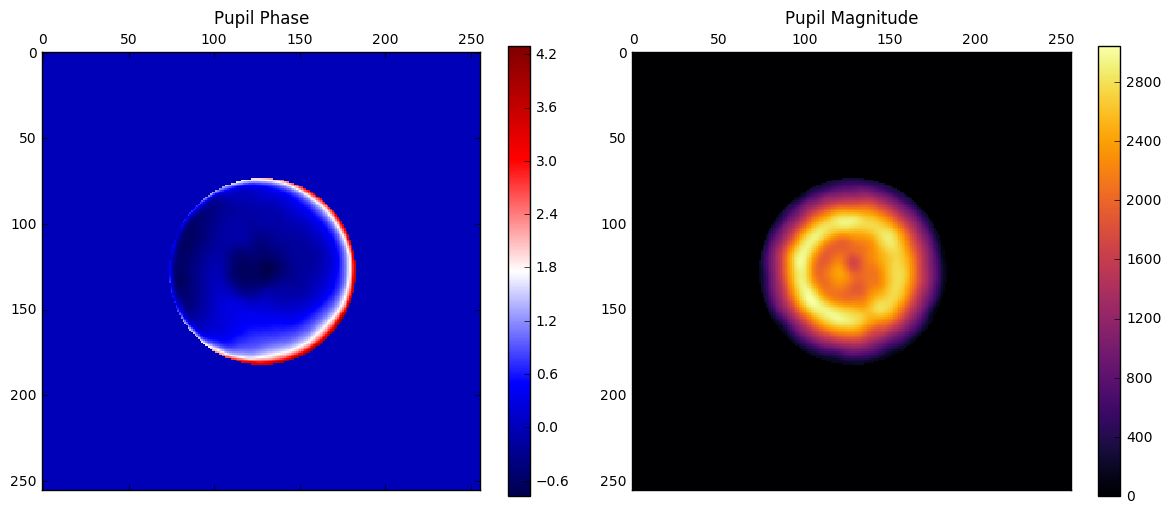

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


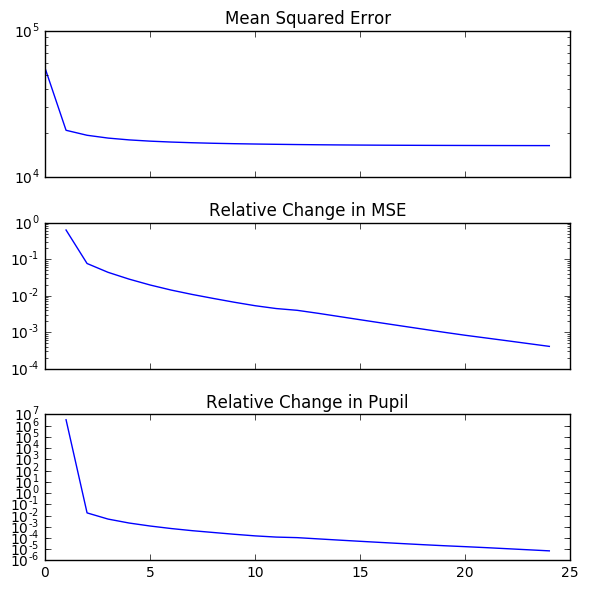

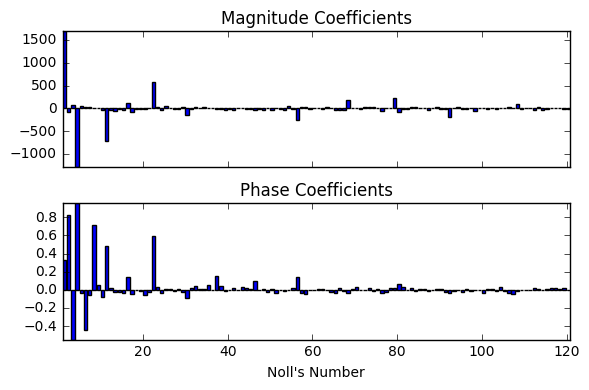

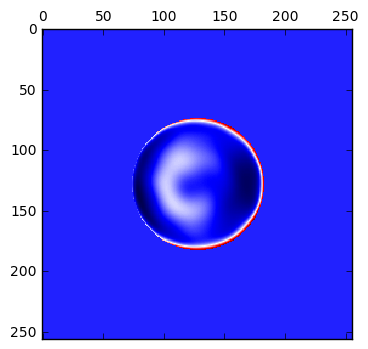

In [3]:
junk = prep_data_for_PR(test_data, None, 1.5)
params["size"] = 256
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
zd_result = result.fit_to_zernikes(120)
zd_result.plot_coefs()
matshow(zd_result.phase(slice(4, None, None)), cmap="seismic")
colorbar()

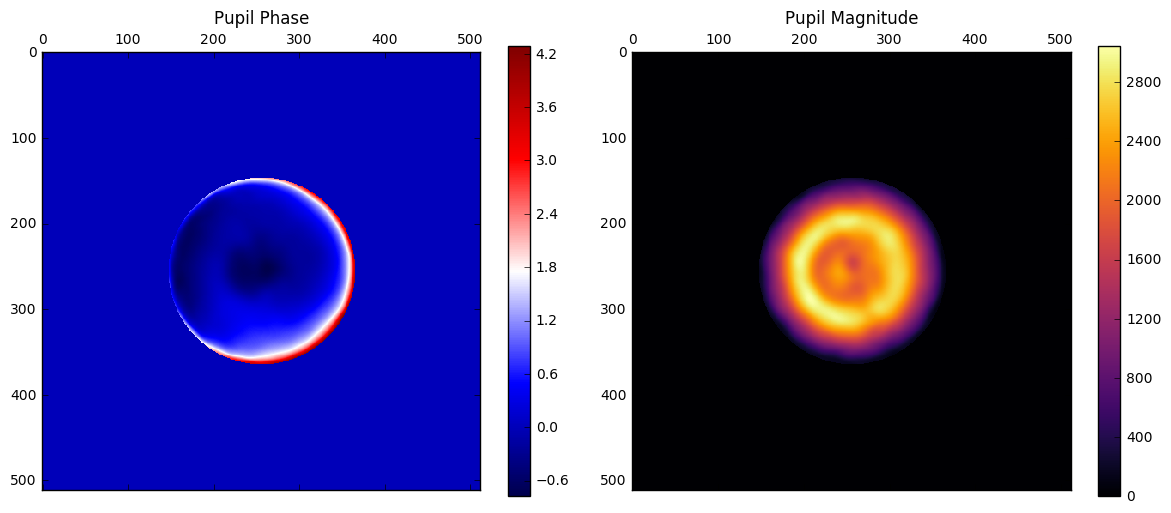

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


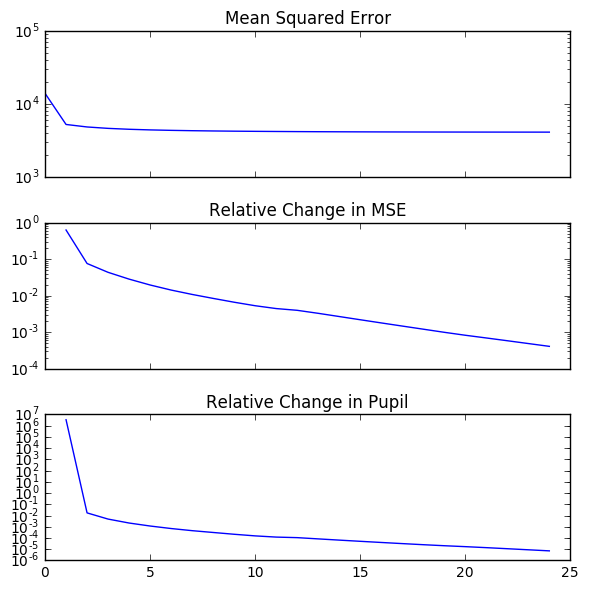

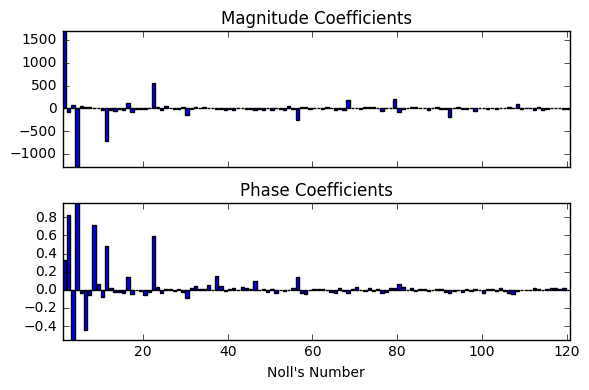

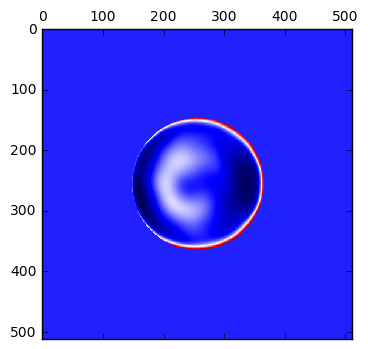

In [4]:
junk = prep_data_for_PR(test_data, 512, 1.5)
params["size"] = 512
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
zd_result2 = result.fit_to_zernikes(120)
zd_result2.plot_coefs()
matshow(zd_result2.phase(slice(4, None, None)), cmap="seismic")

(<matplotlib.figure.Figure at 0x1af07c6e2e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF07BD5208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AF085F5FD0>], dtype=object))

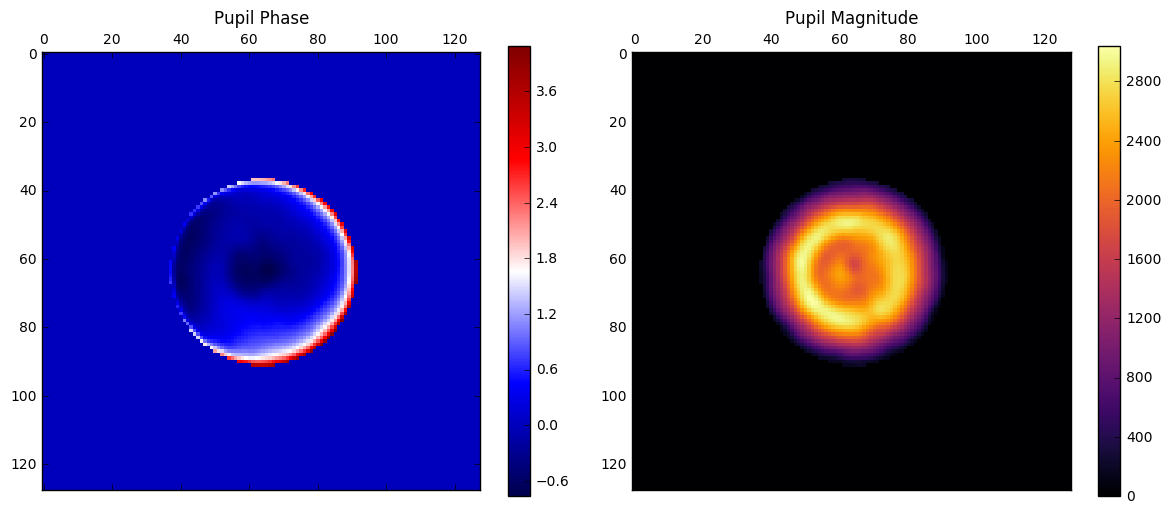

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


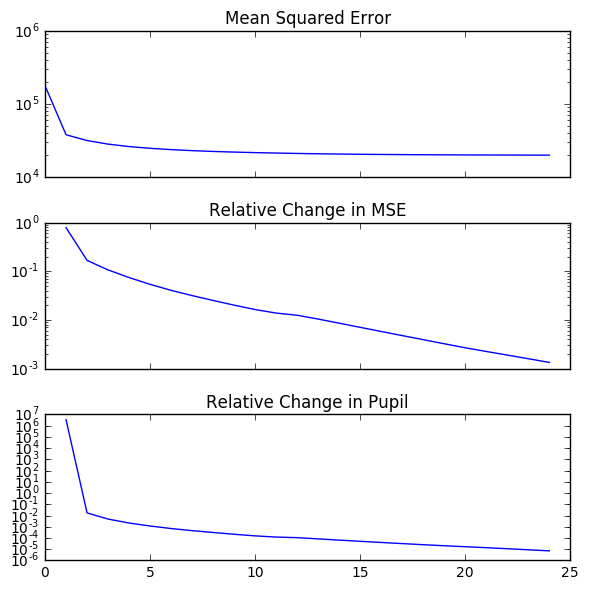

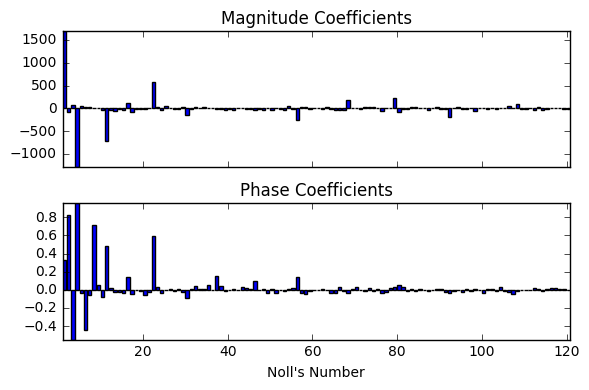

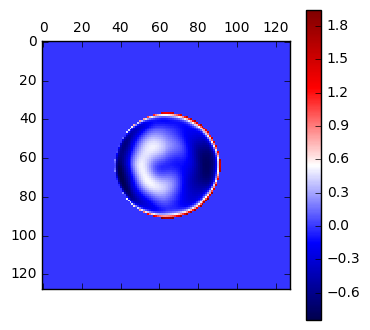

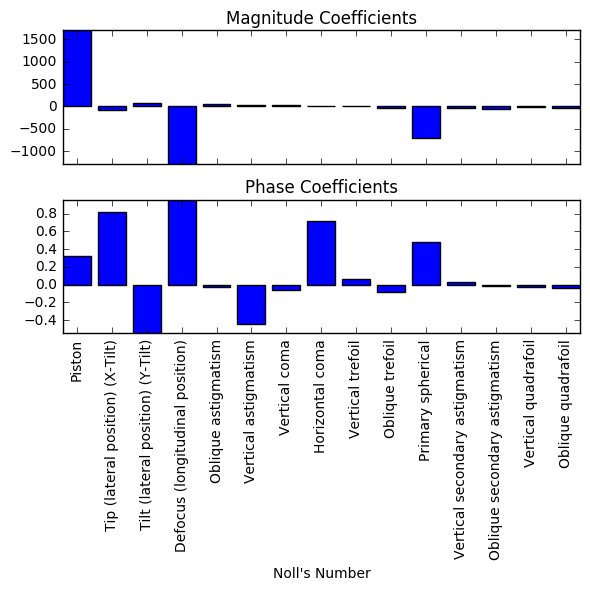

In [4]:
junk = prep_data_for_PR(test_data, 128, 1.5)
params["size"] = 128
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
result.fit_to_zernikes(120)
result.zd_result.plot_coefs()
matshow(result.zd_result.phase(slice(4, None, None)), cmap="seismic")
colorbar()
result.zd_result.plot_named_coefs()

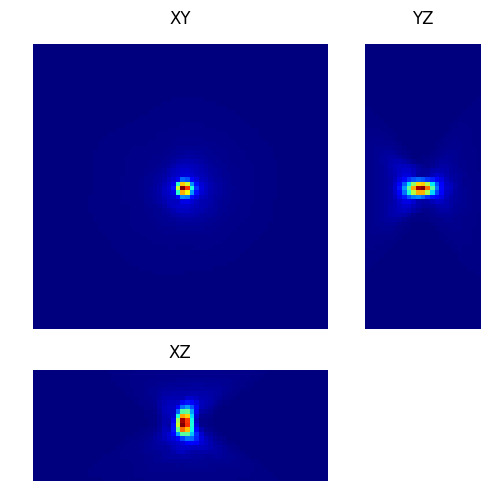

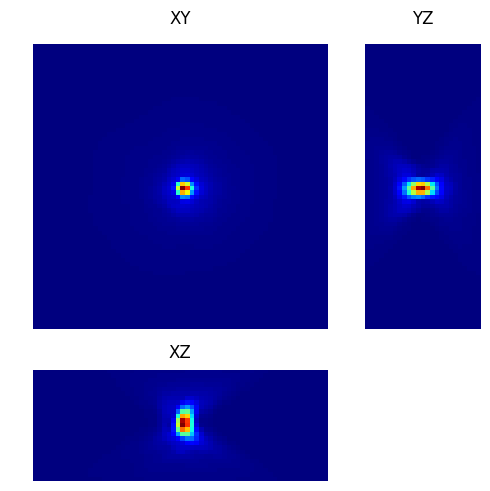

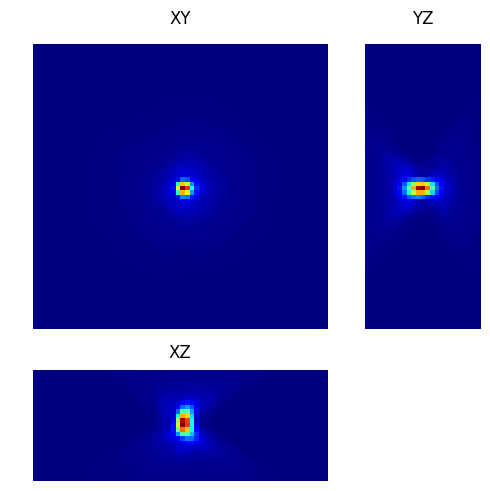

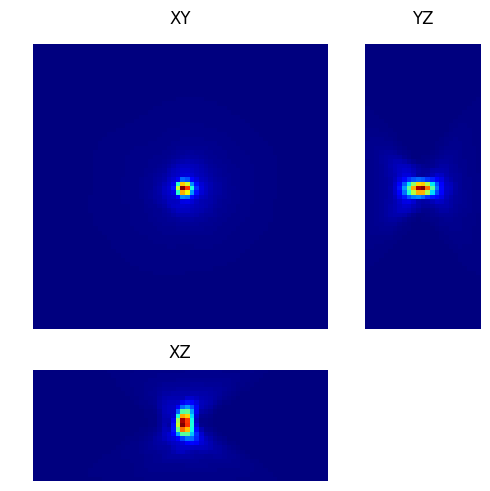

In [28]:
for s in (128, 256, 512, 1024):
    mip(result.generate_psf(size=s)[:, s // 2 - 32:s // 2 + 32, s // 2 - 32:s // 2 + 32])

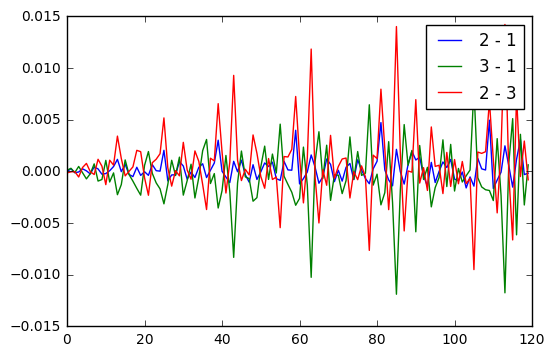

In [11]:
plot(zd_result2.pcoefs - zd_result.pcoefs, label="2 - 1")
plot(zd_result3.pcoefs - zd_result.pcoefs, label="3 - 1")
plot(zd_result2.pcoefs - zd_result3.pcoefs, label="2 - 3")
legend()

In [17]:
print(zd_result.zerns.shape)
print(zd_result2.zerns.shape)
print(zd_result3.zerns.shape)

(120, 256, 256)

In [ ]:
junk = remove_bg(center_data(test_data))
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)

In [5]:
junk = remove_bg(center_data(test_data))[5:-5]
params["zsize"] = junk.shape[0]
result = retrieve_phase(junk, params, 250, pupil_tol=nan, mse_tol=nan, phase_only=False)

(<matplotlib.figure.Figure at 0x1f1b9346940>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1B934CA20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F1B93D35C0>], dtype=object))

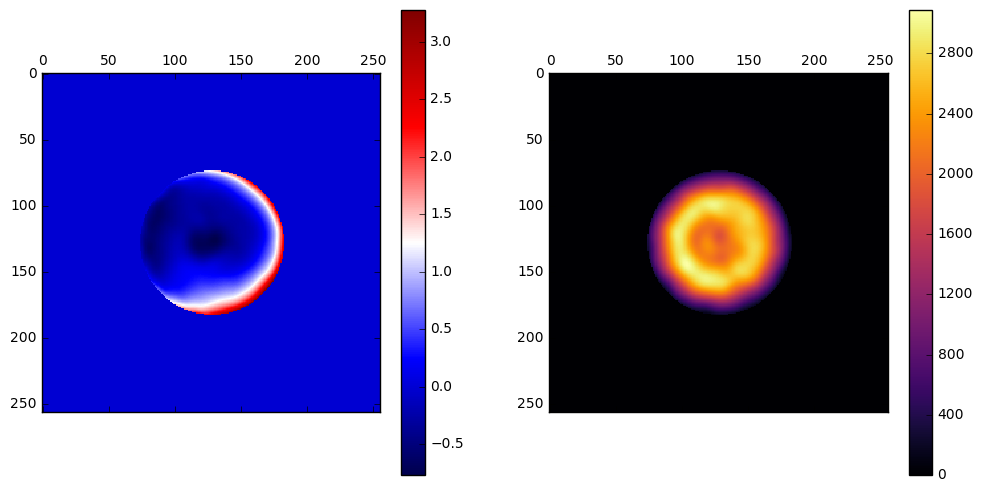

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


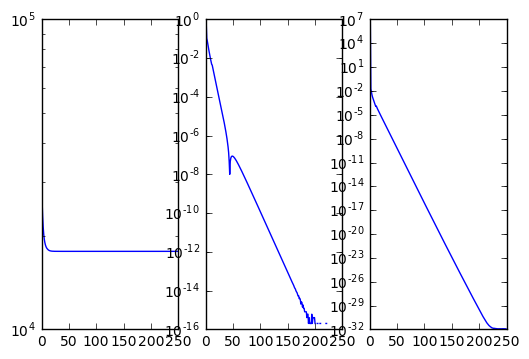

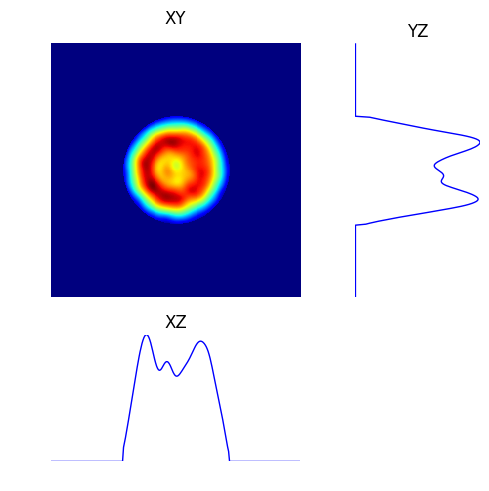

In [6]:
fig, axs = subplots(1, 2, figsize = (12, 6))
img1 = axs[0].matshow(result.phase, cmap="seismic")
colorbar(img1, ax=axs[0])
img2 = axs[1].matshow(result.mag, cmap="inferno")
colorbar(img2, ax=axs[1])
fig, axs = subplots(1, 3)
for ax, data in zip(axs, (result.mse, result.mse_diff, result.pupil_diff)):
    ax.semilogy(data)
    
slice_plot(result.mag)

In [7]:
junk = remove_bg(center_data(test_data))[9:-9]
params["zsize"] = junk.shape[0]
result = retrieve_phase(junk, params, 250, pupil_tol=nan, mse_tol=nan, phase_only=False)

(<matplotlib.figure.Figure at 0x1f1b97623c8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1BA7DEDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F1B9298E80>], dtype=object))

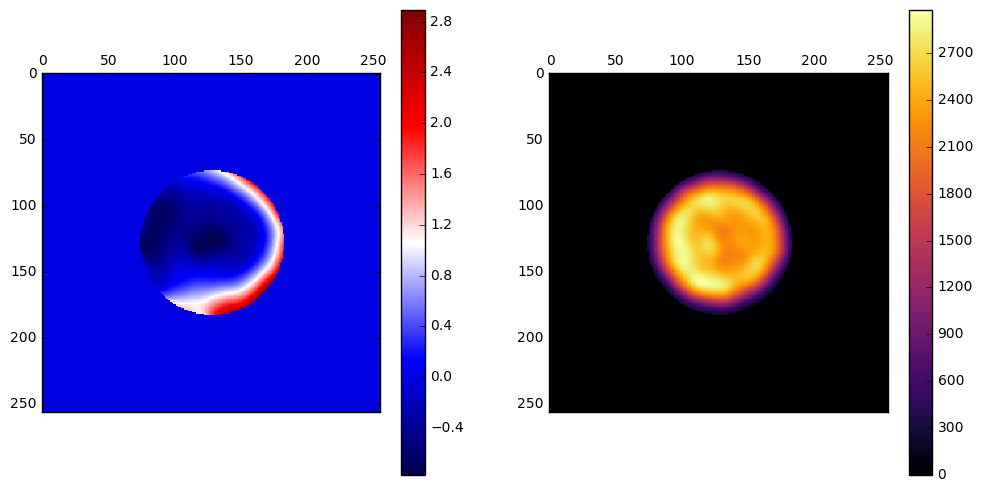

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


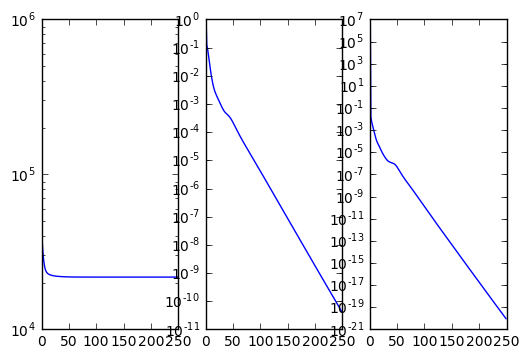

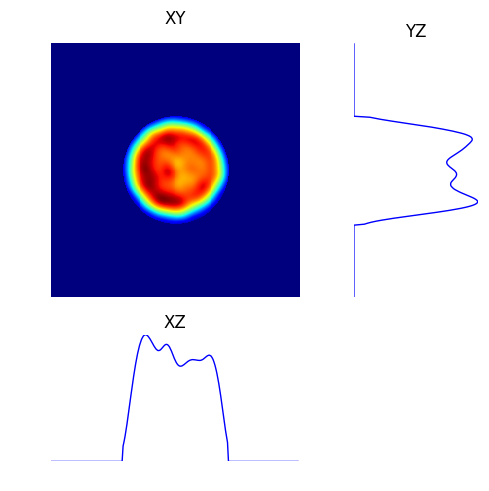

In [8]:
fig, axs = subplots(1, 2, figsize = (12, 6))
img1 = axs[0].matshow(result.phase, cmap="seismic")
colorbar(img1, ax=axs[0])
img2 = axs[1].matshow(result.mag, cmap="inferno")
colorbar(img2, ax=axs[1])
fig, axs = subplots(1, 3)
for ax, data in zip(axs, (result.mse, result.mse_diff, result.pupil_diff)):
    ax.semilogy(data)
    
slice_plot(result.mag)

In [103]:
junk = remove_bg(center_data(test_data))[3:-3:4]
params["zsize"] = junk.shape[0]
params["zres"] = 300*4

result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)

(<matplotlib.figure.Figure at 0x1f1ce9fe358>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1855C6518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F1E5807BA8>], dtype=object))

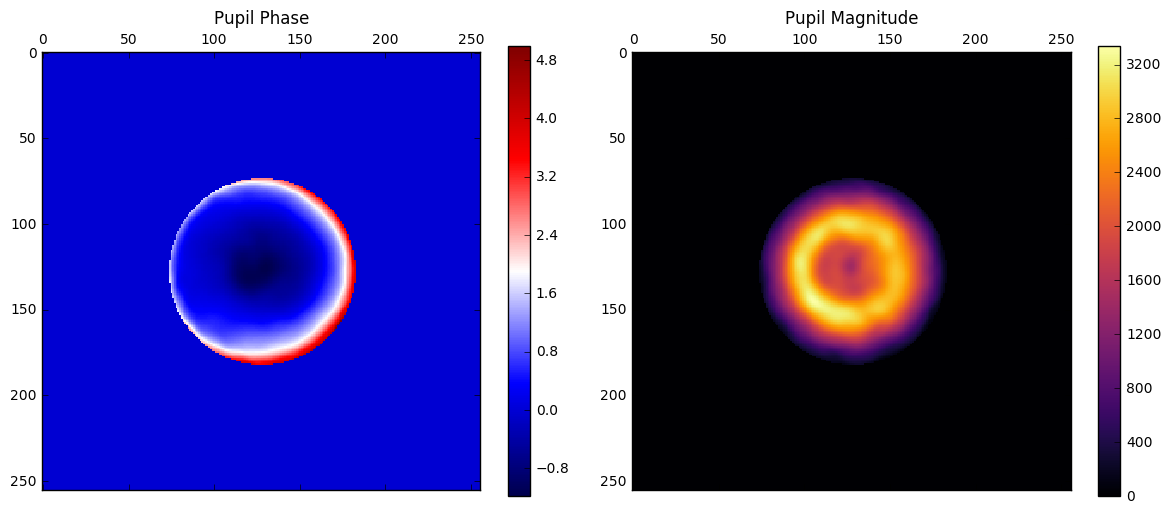

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


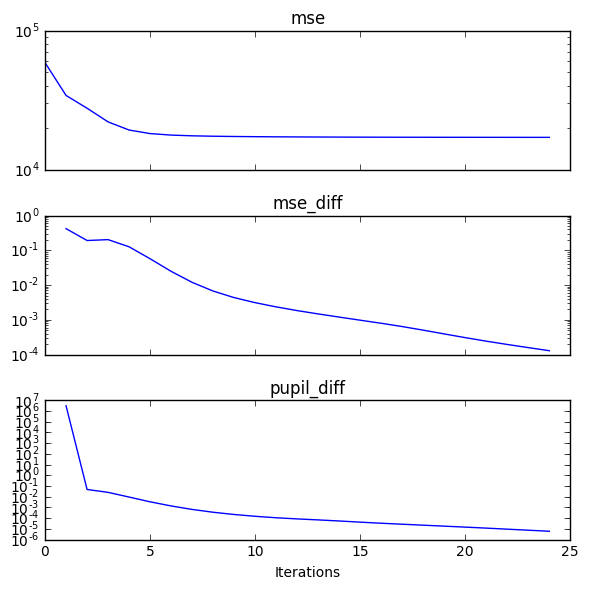

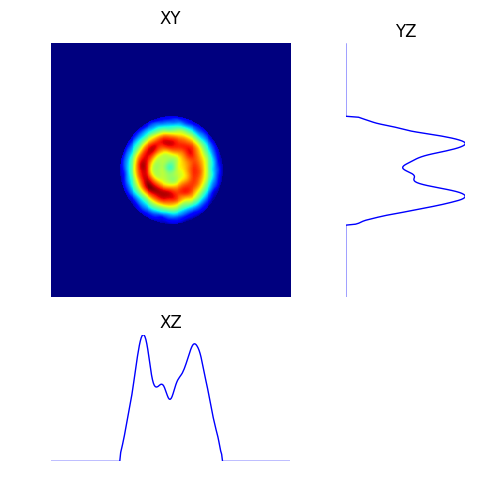

In [152]:
fig, (ax_phase, ax_mag) = subplots(1, 2, figsize = (12, 5))
phase_img = ax_phase.matshow(result.phase, cmap="seismic")
colorbar(phase_img, ax=ax_phase)
mag_img = ax_mag.matshow(result.mag, cmap="inferno")
colorbar(mag_img, ax=ax_mag)
ax_phase.set_title("Pupil Phase")
ax_mag.set_title("Pupil Magnitude")

fig.tight_layout()

fig, axs = subplots(3, 1, figsize=(6,6), sharex=True)
for ax, data in zip(axs, (result.mse, result.mse_diff, result.pupil_diff)):
    ax.semilogy(data)
for ax, t in zip(axs, ("mse", "mse_diff", "pupil_diff")):
    ax.set_title(t)
ax.set_xlabel("Number of Iterations")
fig.tight_layout()
    
slice_plot(result.mag)

(<matplotlib.figure.Figure at 0x1f1c2bff0b8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1BBC40A58>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x000001F1B92F47B8>]], dtype=object))

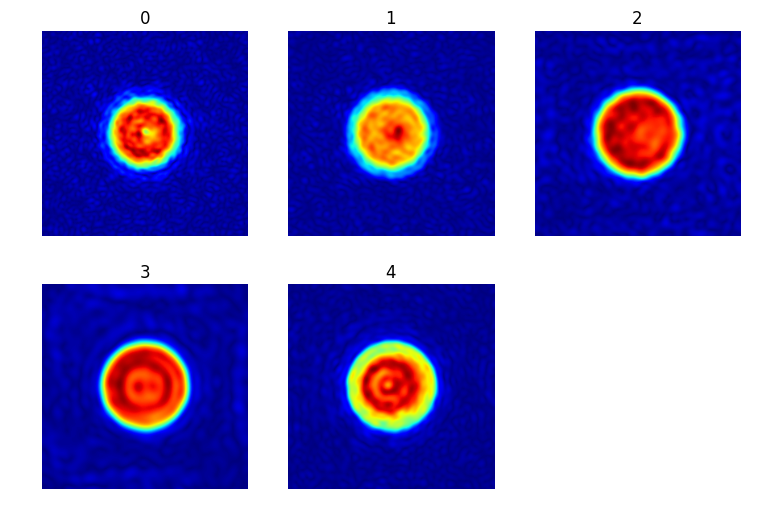

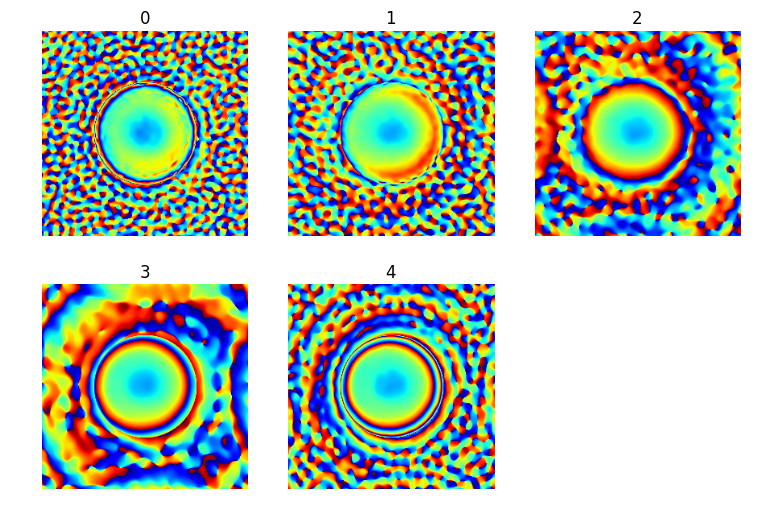

In [83]:
display_grid({i:ifftshift(abs(p)) for i, p in enumerate(result.pupils)})
display_grid({i:ifftshift(angle(p)) for i, p in enumerate(result.pupils)})

In [12]:
from pyOTF.zernike import *

In [84]:
psf = HanserPSF(**params)

In [85]:
psf._gen_kr()

In [86]:
r, theta = ifftshift(psf._kr / (psf.na/psf.wl)), ifftshift(psf._phi)

In [98]:
len(noll_mapping)

120

In [216]:
zerns = zernike(r, theta, arange(1,12), norm=False)

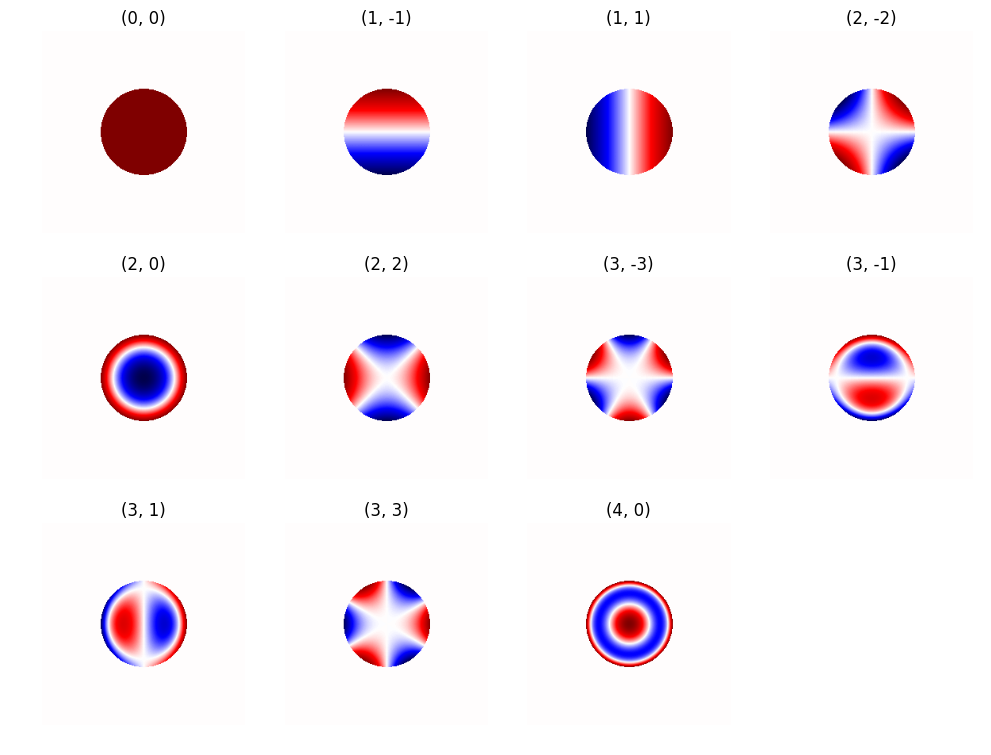

In [217]:
display_grid({noll2degrees(i+1): z for i, z in enumerate(zerns)}, vmin=-1, vmax=1, cmap="seismic");

In [ ]:
xticks()

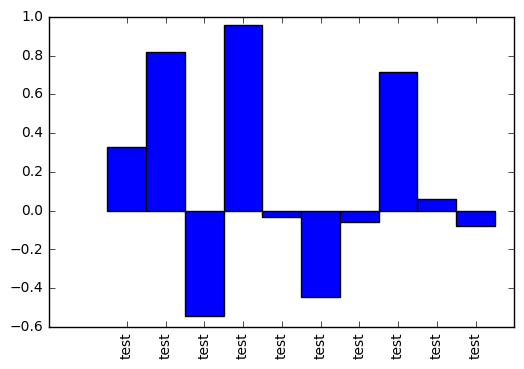

In [23]:
fig, ax =subplots(1,1)
ax.bar(arange(zd_result3.pcoefs.size)[:10],zd_result3.pcoefs[:10],1, tick_label=("test"), align="center")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")

<Container object of 120 artists>

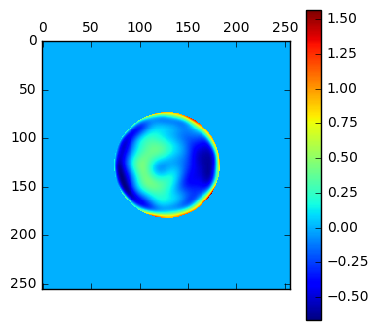

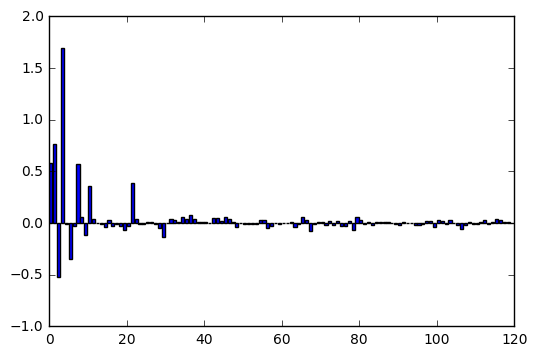

In [137]:
x2 = x.copy()

x2[:4]=0
junk_phase2 = (x2[:, newaxis, newaxis]*zerns).sum(0)
matshow(junk_phase2)
colorbar()
figure()
bar(arange(x.size),x)